## Case 3: Isolation of one of the areas from main grid


**Single Line Diagram of system**

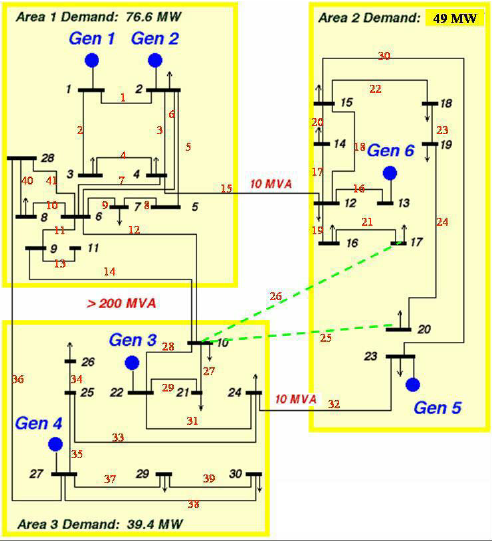

In [1]:
from IPython.display import Image
Image(filename='case3/case3.png')

**Importing Data and packages**

In [2]:
import pandas as pd
import networkx as nx
import numpy as np
import params as params
import matplotlib.pyplot as plt

from pypower.api import ppoption, runpf, case30

grid = case30()
ppopt = ppoption(PF_ALG=1)

line_data = pd.DataFrame(grid['branch'],
                     columns=['fbus', 'tbus', 'r', 'x', 'b', 'rateA', 'rateB', 'rateC', 'ratio', 'angle',
                              'status', 'angmin', 'angmax'])
line_data = line_data.astype({'fbus': int, 'tbus': int, 'status': int})

bus_data = pd.DataFrame(grid['bus'],
                        columns=['bus_i', 'type', 'Pd', 'Qd', 'Gs', 'Bs', 'area', 'Vm', 'Va', 'baseKV', 'zone',
                              'Vmax', 'Vmin'])
bus_data = bus_data.astype({'bus_i': int, 'type': int})

gen_data = pd.DataFrame(grid['gen'], columns=['bus', 'Pg', 'Qg', 'Qmax', 'Qmin', 'Vg', 'mBase', 'status', 'Pmax',
     'Pmin', 'Pc1', 'Pc2', 'Qc1min', 'Qc1max', 'Qc2min', 'Qc2max', 'ramp_agc', 'ramp_10', 'ramp_30', 'ramp_q', 'apf'])
gen_data = gen_data.astype({'bus': int, 'status': int})

DERs = set(gen_data['bus'])
CLs = set(bus_data['bus_i'][bus_data['Pd'] > 10])

bus_data

,bus_i,type,Pd,Qd,Gs,Bs,area,Vm,Va,baseKV,zone,Vmax,Vmin
0,1,3,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
1,2,2,21.7,12.7,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.10,0.95
2,3,1,2.4,1.2,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
3,4,1,7.6,1.6,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
4,5,1,0.0,0.0,0.0,0.19,1.0,1.0,0.0,135.0,1.0,1.05,0.95
5,6,1,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
6,7,1,22.8,10.9,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
7,8,1,30.0,30.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
8,9,1,0.0,0.0,0.0,0.00,1.0,1.0,0.0,135.0,1.0,1.05,0.95
9,10,1,5.8,2.0,0.0,0.00,3.0,1.0,0.0,135.0,1.0,1.05,0.95



#### Modification to the standard 30 bus, 6 generator system:
**Tie Line switch is added between bus (2 and 16), (21, 20) between areas (1 and 2) , (3 and 2) respectively.**


In [3]:
line_data.loc[41] = [2, 16, 0.06, 0.18, 0.02, 65, 65, 65, 0, 0, 0, -360, 360]
line_data.loc[42] = [21, 20, 0.01, 0.02, 0, 32, 32, 32, 0, 0, 0, -360, 360]
line_data = line_data.astype({'fbus': int, 'tbus': int, 'status': int})
grid['branch'] = line_data.values
line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.02,0.06,0.03,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
1,1,3,0.05,0.19,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
2,2,4,0.06,0.17,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
3,3,4,0.01,0.04,0.00,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
4,2,5,0.05,0.20,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
5,2,6,0.06,0.18,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
6,4,6,0.01,0.04,0.00,90.0,90.0,90.0,0.0,0.0,1,-360.0,360.0
7,5,7,0.05,0.12,0.01,70.0,70.0,70.0,0.0,0.0,1,-360.0,360.0
8,6,7,0.03,0.08,0.01,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
9,6,8,0.01,0.04,0.00,32.0,32.0,32.0,0.0,0.0,1,-360.0,360.0


**Verifying normal operation of system after change using power flow calculation**

In [4]:
pf_res, success = runpf(grid)
print('power flow converged') if success else print('power flow did not converge')

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power flow converged in 3 iterations.

Converged in 0.01 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0         -95.0 to 405.9
Generators         6     On-line Capacity       335.0         -95.0 to 405.9
Committed Gens     6     Generation (actual)    191.6             100.4
Loads             20     Load                   189.2             107.2
  Fixed           20       Fixed                189.2             107.2
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          43     Losses (I^2 * Z)         2.44              8.99
Transformers       0     Branc

**Adding edges and weights to graph**

In [5]:
from utilities import Utils
utils = Utils()
G, status = utils.make_graph(line_data)


**Calculating N-1 and N-2 branch resiliency of the network**

In [6]:
# Calculation of N-1 branch resiliency
edges = G.edges
res_list = []
net_cnt = 0
for u, v in edges:
    G.remove_edge(u, v)
    path_list = utils.find_path_list(G, CLs, DERs)
    FNs, raw_combs = utils.path_combinations(path_list)
    rsl = params.ratio_source_load(FNs, CLs, DERs)
    ops = params.switch_ops(FNs, status)
    cen = params.agg_centrality(FNs)
    obs = params.overlapping_branches(FNs)
    apl = params.avg_path_length(raw_combs)
    df = pd.DataFrame(np.array([rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
    df.index = ['rsl', 'ops', 'cen', 'obs', 'apl']
    df = df.T
    df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
    df['resiliency'] = np.exp(-df['wtd_mean'])
    res_list.append(sum(df['resiliency']))
    net_cnt += df.shape[0]
    G.add_edge(u, v)


# Calculation of N-2 branch Resiliency
res_list2 = []
net_cnt2 = 0
for i, (u, v) in enumerate(edges):
    G.remove_edge(u, v)
    for j, (l, r) in enumerate(edges):
        if i == j: continue
        G.remove_edge(l, r)
        path_list = utils.find_path_list(G, CLs, DERs)
        FNs, raw_combs = utils.path_combinations(path_list)
        rsl = params.ratio_source_load(FNs, CLs, DERs)
        ops = params.switch_ops(FNs, status)
        cen = params.agg_centrality(FNs)
        obs = params.overlapping_branches(FNs)
        apl = params.avg_path_length(raw_combs)
        df = pd.DataFrame(np.array([rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
        df.index = ['rsl', 'ops', 'cen', 'obs', 'apl']
        df = df.T
        df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
        df['resiliency'] = np.exp(-df['wtd_mean'])
        res_list2.append(sum(df['resiliency']))
        net_cnt2 += df.shape[0]
        G.add_edge(l, r)
    G.add_edge(u, v)

    

**Visualizing modified network**

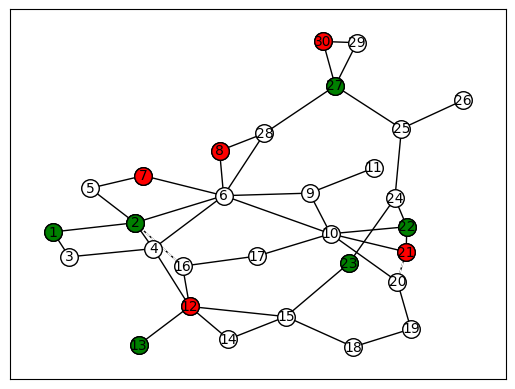

In [7]:
import visual

def plot_graph(G):
    pos = nx.layout.fruchterman_reingold_layout(G)
    options={
        'linewidths': 1,
        'edgecolors': 'black',
        'node_size': 160
    }
    nx.draw_networkx_nodes(G, pos, bus_data['bus_i'], node_color='white', **options)
    nx.draw_networkx_nodes(G, pos, CLs, node_color='red', **options)
    nx.draw_networkx_nodes(G, pos, DERs, node_color='green', **options)
    nx.draw_networkx_edges(G, pos, G.edges)
    nx.draw_networkx_edges(G, pos, [edge for edge in G.edges if status[edge] == 0], edge_color = 'white', style='dashed')
    nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=10)
    plt.show()
plot_graph(G)
visual.interactive_graph(G, CLs, DERs)

#### Simulating Contingency:
**Line between buses (15 and 17), (10 and 26), (10 and 25), (24 and 23) are faulted resulting in isolation of area 2.**

In [8]:
line_data = line_data.drop([14, 24, 25, 31])
grid['branch'] = line_data.values
line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.02,0.06,0.03,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
1,1,3,0.05,0.19,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
2,2,4,0.06,0.17,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
3,3,4,0.01,0.04,0.00,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
4,2,5,0.05,0.20,0.02,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
5,2,6,0.06,0.18,0.02,65.0,65.0,65.0,0.0,0.0,1,-360.0,360.0
6,4,6,0.01,0.04,0.00,90.0,90.0,90.0,0.0,0.0,1,-360.0,360.0
7,5,7,0.05,0.12,0.01,70.0,70.0,70.0,0.0,0.0,1,-360.0,360.0
8,6,7,0.03,0.08,0.01,130.0,130.0,130.0,0.0,0.0,1,-360.0,360.0
9,6,8,0.01,0.04,0.00,32.0,32.0,32.0,0.0,0.0,1,-360.0,360.0


**Visualizing the network after contingency**

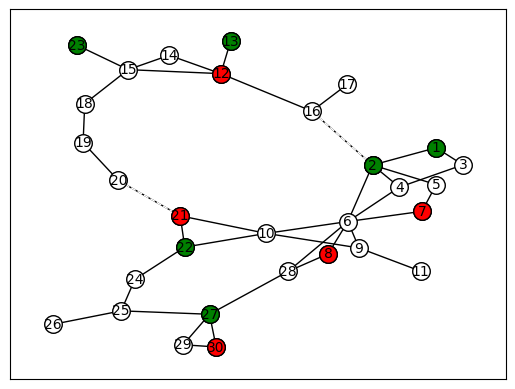

In [9]:
G, status = utils.make_graph(line_data)
plot_graph(G)

**Power flow analysis of the network after contingency**

In [10]:
try:
    pf_res, success = runpf(grid)
    print('Power flow converged') if success else print('Power flow did not converge')
except:
    print('Power flow did not converge')

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power did not converge in 10 iterations.

Did not converge (0.01 seconds)

|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0         -95.0 to 405.9
Generators         6     On-line Capacity       335.0         -95.0 to 405.9
Committed Gens     6     Generation (actual)    190.9             102.3
Loads             20     Load                   189.2             107.2
  Fixed           20       Fixed                189.2             107.2
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          39     Losses (I^2 * Z)         2.92             10.21
Transformers       0

### Finding Networks to restore the islanded critical node

**Finding all simple paths from each critical load to each source**

In [11]:
path_list = utils.find_path_list(G, CLs, DERs)

**All possible path combination calculation**

In [12]:
FNs, raw_combs = utils.path_combinations(path_list)

### Calculating parameters to measure resiliency of possible network

**Calculation of Parameter matrix**

In [13]:
id = range(len(FNs))
rsl = params.ratio_source_load(FNs, CLs, DERs)
ops = params.switch_ops(FNs, status)
cen = params.agg_centrality(FNs)
obs = params.overlapping_branches(FNs)
apl = params.avg_path_length(raw_combs)

df = pd.DataFrame(np.array([id, rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
df.index = ['id', 'rsl', 'ops', 'cen', 'obs', 'apl']
df = df.T
df = df.astype({'id': int})
print(df)

          id       rsl  ops       cen       obs  apl
FN1        0  1.666667  0.0  0.136364  0.400000  3.0
FN2        1  1.666667  0.0  0.128205  0.375000  3.2
FN3        2  1.666667  0.0  0.141026  0.214286  2.8
FN4        3  1.666667  0.0  0.131868  0.200000  3.0
FN5        4  1.666667  0.0  0.128205  0.375000  3.2
...      ...       ...  ...       ...       ...  ...
FN1340  1339  1.666667  0.0  0.141026  0.076923  2.6
FN1341  1340  1.666667  0.0  0.151515  0.000000  2.2
FN1342  1341  1.666667  0.0  0.141026  0.000000  2.4
FN1343  1342  1.666667  1.0  0.123810  0.066667  3.0
FN1344  1343  1.666667  1.0  0.116667  0.062500  3.2

[1344 rows x 6 columns]


**Calculation of weighted mean and resiliency**

In [17]:
df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
df['resiliency'] = np.exp(-df['wtd_mean'])
print('Resiliency of network considering N-1 branches: ', sum(res_list)/net_cnt)
print('Resiliency of network considering N-2 branches: ', sum(res_list2)/net_cnt2, '\n')
print('Resiliency and parameters of feasible networks for case 3:', '\n')
print(df.sort_values('resiliency', ascending=False))

Resiliency of network considering N-1 branches:  0.17919124598924915
Resiliency of network considering N-2 branches:  0.18105920602528797 

Resiliency and parameters of feasible networks for case 3: 

          id   rsl  ops       cen       obs  apl  wtd_mean  resiliency
FN179    178  1.25  0.0  0.115385  0.000000  1.8  0.830769    0.435714
FN180    179  1.25  0.0  0.109890  0.000000  2.0  0.880495    0.414578
FN207    206  1.25  0.0  0.109890  0.000000  2.0  0.880495    0.414578
FN177    176  1.25  0.0  0.109890  0.000000  2.0  0.880495    0.414578
FN1019  1018  1.25  0.0  0.128205  0.000000  2.0  0.881410    0.414198
...      ...   ...  ...       ...       ...  ...       ...         ...
FN1175  1174  2.50  1.0  0.141026  0.214286  2.8  1.660623    0.190021
FN1204  1203  2.50  1.0  0.123810  0.133333  3.0  1.689524    0.184607
FN1176  1175  2.50  1.0  0.131868  0.200000  3.0  1.706593    0.181483
FN1161  1160  2.50  1.0  0.131868  0.200000  3.0  1.706593    0.181483
FN1162  1161  2.50

**Comparing line data before and after switching to the suggested network**

In [15]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"
    display(HTML(output))

df1 = line_data[['fbus', 'tbus', 'r', 'x', 'status']]

for network in FNs:
    tmp_line = line_data
    for u, v in network:
        tmp_line.loc[(tmp_line.fbus == u) & (tmp_line.tbus == v), 'status'] = 1
        tmp_line.loc[(tmp_line.fbus == v) & (tmp_line.tbus == u), 'status'] = 1
    grid['branch'] = tmp_line.values
    pf_res, success = runpf(grid)
    if success:
        line_data = tmp_line
        break
df2 = line_data[['fbus', 'tbus', 'r', 'x', 'status']]

display_side_by_side([df1, df2], ['Line data after contingency', 'Line data after reconfiguration'])

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power did not converge in 10 iterations.

Did not converge (0.01 seconds)

|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0         -95.0 to 405.9
Generators         6     On-line Capacity       335.0         -95.0 to 405.9
Committed Gens     6     Generation (actual)    190.9             102.3
Loads             20     Load                   189.2             107.2
  Fixed           20       Fixed                189.2             107.2
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          39     Losses (I^2 * Z)         2.92             10.21
Transformers       0

/var/folders/ym/34_l97r95s734_tzqbrstc2r0000gn/T/ipykernel_34800/2888470551.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML



Newton's method power did not converge in 10 iterations.

Did not converge (0.01 seconds)

|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             30     Total Gen Capacity     335.0         -95.0 to 405.9
Generators         6     On-line Capacity       335.0         -95.0 to 405.9
Committed Gens     6     Generation (actual)    190.9             102.3
Loads             20     Load                   189.2             107.2
  Fixed           20       Fixed                189.2             107.2
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             2     Shunt (inj)             -0.0               0.2
Branches          39     Losses (I^2 * Z)         2.92             10.21
Transformers       0     Branch Charging (inj)     -               15.6
Inter-ties   

,fbus,tbus,r,x,status
0,1,2,0.020000,0.060000,1
1,1,3,0.050000,0.190000,1
2,2,4,0.060000,0.170000,1
3,3,4,0.010000,0.040000,1
4,2,5,0.050000,0.200000,1
5,2,6,0.060000,0.180000,1
6,4,6,0.010000,0.040000,1
7,5,7,0.050000,0.120000,1
8,6,7,0.030000,0.080000,1
9,6,8,0.010000,0.040000,1


**Visualizing network having highest resiliency with operation feasibility**

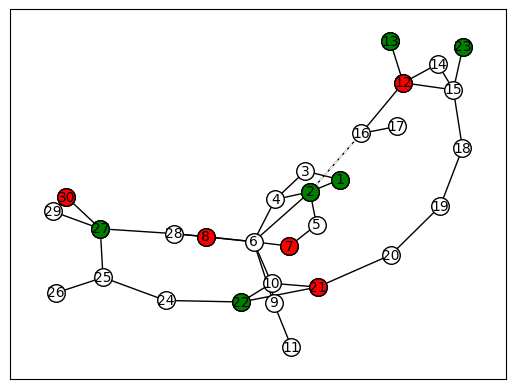

In [16]:
G, status = utils.make_graph(line_data)
plot_graph(G)

**Area 2 successfully connected to main grid**